# Imports

In [2]:
import json
import pandas as pd
import numpy as np
import sqlalchemy as db
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Data Query

In [3]:
# Load your PostgreSQL credential to `database_creds`
database_creds_file = open('./database_cred.json', 'r')
database_creds = json.loads(database_creds_file.read())

In [4]:
# Sign into your database
engine = db.create_engine(database_creds['url'])

connection = engine.connect()
metadata = db.MetaData()

In [5]:
# Run query and return the dataset as Pandas dataframe
sql = """
SELECT *
FROM ny_dhs_weekly
"""

weekly_df = pd.read_sql_query(sql, engine)

In [6]:
# Set 'date_of_census' column as index
weekly_df = weekly_df.set_index('date_of_census')

In [7]:
weekly_df.head()

,total_adults_in_shelter,total_children_in_shelter,total_individuals_in_shelter,single_adult_men_in_shelter,single_adult_women_in_shelter,total_single_adults_in_shelter,families_with_children_in_shelter,adults_in_families_with_children_in_shelter,children_in_families_with_children_in_shelter,total_individuals_in_families_with_children_in_shelter_,adult_families_in_shelter,individuals_in_adult_families_in_shelter
date_of_census,,,,,,,,,,,,
2019-12-01,38273,21709,59982,12128,4590,16719,12195,16308,21709,38017,2492,5245
2019-11-24,38490,21801,60292,12251,4613,16864,12230,16361,21801,38163,2499,5264
2019-11-17,38533,21885,60419,12178,4616,16794,12265,16425,21885,38311,2523,5313
2019-11-10,38291,21797,60089,12072,4551,16623,12213,16347,21797,38144,2523,5320
2019-11-03,38242,21747,59989,12013,4556,16570,12205,16342,21747,38089,2526,5329


# Exploratory Data Anaysis (EDA)

---

### 1. Children to Adults Ratio

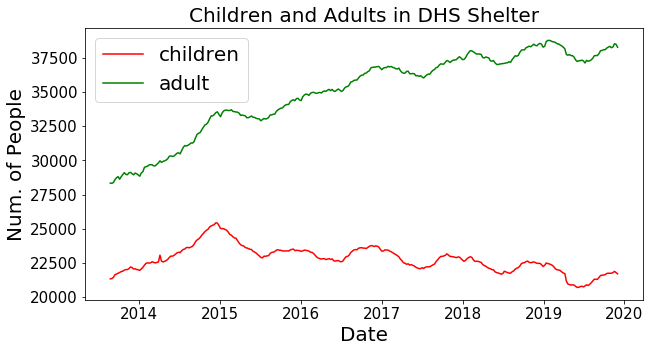

In [71]:
plt.figure(figsize = (10, 5))
plt.plot(weekly_df['total_children_in_shelter'],color = 'red', label = 'children')
plt.plot(weekly_df['total_adults_in_shelter'],color = 'green', label = 'adult')
plt.title('Children and Adults in DHS Shelter', fontsize = 20)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Num. of People', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 20);

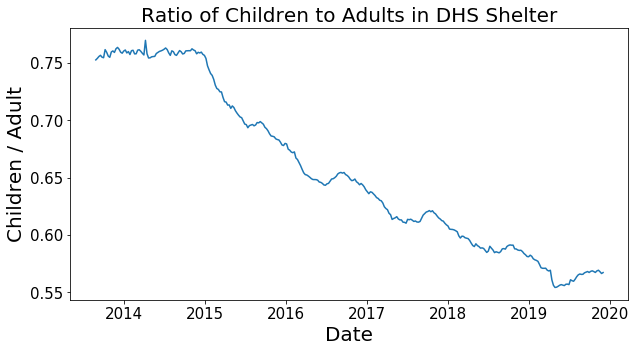

In [69]:
plt.figure(figsize = (10, 5))
plt.plot(weekly_df['total_children_in_shelter'] / weekly_df['total_adults_in_shelter'])
plt.title('Ratio of Children to Adults in DHS Shelter', fontsize = 20)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Children / Adult', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

**Observations** (Children and Adult Ratio)
- The ratio has been constant until 2015 and gradually decrased since then. There seems to be some seasonality. It is also noted that there are always more adult than children.

### 2. Ratio of Individuals Sheltered with Family  and without Family

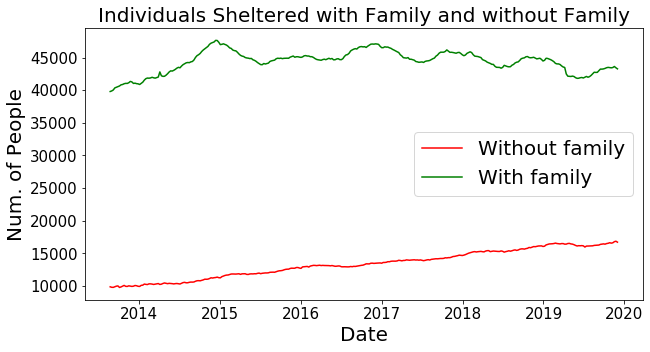

In [65]:
plt.figure(figsize = (10, 5))
plt.plot(weekly_df['total_single_adults_in_shelter'],
         color = 'red', label = 'Without family')
plt.plot((weekly_df['total_individuals_in_families_with_children_in_shelter_']\
          + weekly_df['individuals_in_adult_families_in_shelter'])
         ,color = 'green', label = 'With family')
plt.title('Individuals Sheltered with Family and without Family', fontsize = 20)
plt.legend(fontsize = 20)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Num. of People', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 20);

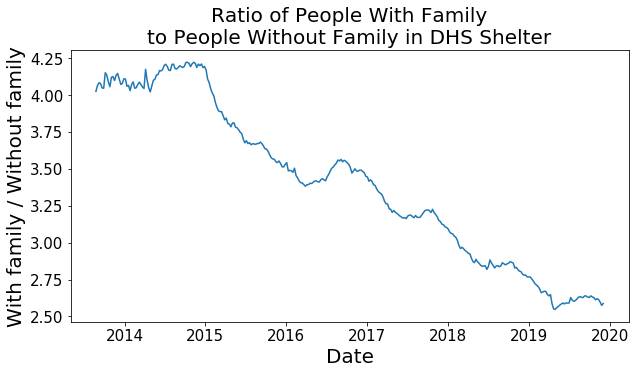

In [59]:
plt.figure(figsize = (10, 5))
plt.plot((weekly_df['total_individuals_in_families_with_children_in_shelter_']\
          + weekly_df['individuals_in_adult_families_in_shelter'])/ weekly_df['total_single_adults_in_shelter'])
plt.title('Ratio of People With Family\nto People Without Family in DHS Shelter', fontsize = 20)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('With family / Without family', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

**Observations** (Ratio of Peole With and Without Family in DHS Shelter)                  
- This Ratio follows similar pattern to the ratio of children and adult. This is because the children would not have been admitted into the shelter and would have been booked into different facility such as orphange if they were not with their family. Towards the end of 2014 and 2016, two picks were observed that were not observed in the ratio of children to adult plot. This indicates that there seems to have been an increase in the family with no children that needed the support from DHS. It is also noted that there are always more people with their family and people without their family.

### 3. Women and Men Ratio

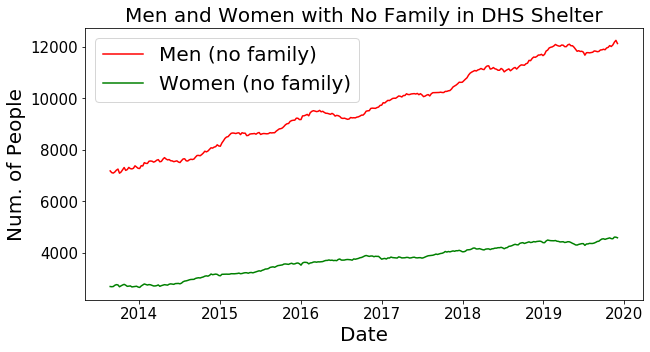

In [62]:
plt.figure(figsize = (10,5))

plt.plot(weekly_df['single_adult_men_in_shelter'],color = 'red', label = 'Men (no family)')
plt.plot(weekly_df['single_adult_women_in_shelter'],color = 'green', label = 'Women (no family)')
plt.title('Men and Women with No Family in DHS Shelter', fontsize = 20)
plt.legend(fontsize = 20)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Num. of People', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 20);

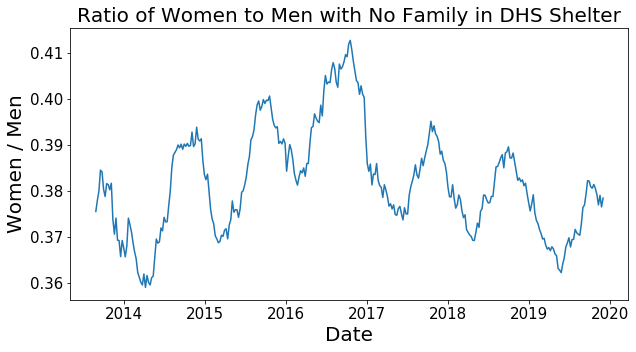

In [66]:
plt.figure(figsize = (10, 5))

plt.plot(weekly_df['single_adult_women_in_shelter']/weekly_df['single_adult_men_in_shelter'])

plt.title('Ratio of Women to Men with No Family in DHS Shelter', fontsize = 20)
plt.xlabel("Date", fontsize = 20)
plt.ylabel("Women / Men", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

**Observations** (Women and Men Ratio)                  
- There seems to be no apparent trend in this ratio change. However, there is a strong seasonality that matches the seasonality pattern were seen in the change in the ratio of people with family to people without family and the ratio of children to adult in DHS shelter. This indicates that there is a higher demand of families and single women for a shelter space during the time the peaks are observed. It is also noted that there are always more men than women in the shelter even when there is a higher booking rate of females.